In [39]:
import pandas as pd 
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [25]:
class AgentState(TypedDict):
    name: str
    age: int
    final: str
    

In [26]:
def first_node(state: AgentState)->AgentState:
    """this is the firs node of our sequence"""
    state["final"] = f"Hi {state["name"]}!"
    return state 
def second_node(state: AgentState)-> AgentState:
    """This is the scond nod of our sequence"""
    state["final"] = state["final"] + f" You are {state['age']} years old"
    return state

In [28]:
graph = StateGraph(AgentState)
graph.add_node("First Node", first_node)
graph.add_node("Second Node", second_node)
graph.add_edge("First Node", "Second Node")
graph.set_entry_point("First Node")
graph.set_finish_point("Second Node")
app = graph.compile()


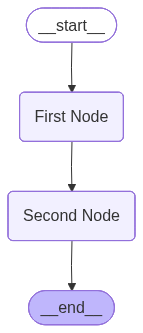

In [29]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
result = app.invoke({"name": "Charlie", "age": "20"})
print(result["final"])

Hi Charlie! You are 20 years old


In [40]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
def first_node(state: AgentState)->AgentState:
    """this function greeets"""
    state["name"] = f"Good morning {state["name"]}"
    return state
def second_node(state: AgentState)->AgentState:
    """This function tell age"""
    state["name"]  = state["name"] + f" I am {state["age"]} years old."
    return state 
def third_node(state: AgentState)->AgentState:
    """List of all skills """
    state["name"] = state["name"] + " I have these skills " + " ".join(state["skills"])

    return state
    

In [ ]:
graph = StateGraph(AgentState)
graph.add_node("Greeter", first_node)
graph.add_node("age", second_node)  
graph.add_node("skills", third_node)
graph.add_edge("Greeter", "age")
graph.add_edge("age", "skills")
app = graph.invoke()

In [ ]:
graph.